In [1]:
%reload_ext autoreload
%autoreload 2

In [3]:
import os
os.chdir("/Users/constantin/workspace/alphaquant/test_data/system_tests/proteoforms/mann_labs_egfr")

In [5]:
PAPER_RESULTS = "paper_results_for_comparison/significantly_changing_functional_sites.csv"
ALPHAQUANT_RESULTS = "results_phospho/untreated_VS_egf_treated.results.tsv"

In [22]:
import pandas as pd

df_aq = pd.read_csv(ALPHAQUANT_RESULTS, sep='\t')
df_aq["gene"] = df_aq["protein"].str.split("_").str[0]
df_aq["site"] = df_aq["protein"].str.split("_").str[-1].str.replace("[", "", regex=False).str.replace("]", "", regex=False).str.split(",").str[0]
df_aq["log2fc"] = - df_aq["log2fc"]

display(df_aq)
df_paper = pd.read_csv(PAPER_RESULTS, sep='\t', decimal=",")
display(df_paper)
df_paper["gene"] = df_paper["PTM_collapse_key"].str.split("_").str[0]
df_paper["site"] = df_paper["PTM_collapse_key"].str.split("_").str[1].str.replace(r'[STY]', '', regex=True)
display(df_paper)

df_merged = df_aq.merge(df_paper, on=["gene", "site"], how="inner", suffixes=("_aq", "_paper"))
display(df_merged)

,condpair,protein,fdr,pval,log2fc,consistency_score,num_ions,pseudoint1,pseudoint2,predscore,gene,site
0,untreated_VS_egf_treated,FAAP100_Q0VG06_[667],9.212951e-01,8.972480e-01,0.112912,7.117647,22,31344.387801,35381.106153,-0.208342,FAAP100,667
1,untreated_VS_egf_treated,YWHAQ_P27348_[nan],1.543796e-04,5.690817e-05,-1.228666,4.958333,17,11878.694097,4304.466840,-0.129348,YWHAQ,nan
2,untreated_VS_egf_treated,PLEKHG3_A1L390_[827],8.903693e-02,5.775765e-02,-0.167131,27.155172,63,88259.125235,99744.701040,-0.218378,PLEKHG3,827
3,untreated_VS_egf_treated,SPEN_Q96T58_[1140],5.071718e-09,1.060050e-09,0.700895,14.250000,15,12949.511569,22557.598867,-0.109979,SPEN,1140
4,untreated_VS_egf_treated,ZC3H11A_O75152_[759],1.989315e-08,4.414207e-09,0.888057,9.000000,18,8950.365724,14928.672028,-0.187153,ZC3H11A,759
...,...,...,...,...,...,...,...,...,...,...,...,...
14975,untreated_VS_egf_treated,PANK4_Q9NVE7_[nan],7.113916e-01,6.471859e-01,-0.122280,1.800000,6,2543.600180,3387.154290,-0.192323,PANK4,nan
14976,untreated_VS_egf_treated,"VANGL1_Q8TAA9_[7, nan]",6.745867e-01,6.048314e-01,-0.118701,4.000000,4,1792.290730,1650.729936,-0.302147,VANGL1,7
14977,untreated_VS_egf_treated,DTL_Q9NZJ0_[nan],8.769624e-01,8.433578e-01,0.250374,7.000000,7,3011.849551,3181.021294,-0.177861,DTL,nan
14978,untreated_VS_egf_treated,"TAB3_Q8N5C8_[373, 378]",1.661551e-04,6.170367e-05,0.667426,7.000000,7,1589.265746,2641.073261,-0.118150,TAB3,373


,Student's T-test q-value EGF_UT,Log2 Fold change,PG.UniProtIds,PTM_collapse_key,functional_score
0,0.003607,1.344323,P01106,MYC_S62_M2,0.998266
1,0.003666,1.330393,P01106,MYC_T58_M2,0.995910
2,0.000000,2.089077,P16949,STMN1_S16_M2,0.994587
3,0.001580,1.208857,P04792,HSPB1_S82_M1,0.993635
4,0.007592,1.512660,O14950;P19105,MYL12B_T19_M2,0.992117
...,...,...,...,...,...
654,0.040064,0.460898,Q9UPQ0,LIMCH1_T215_M2,0.502023
655,0.017401,3.774891,O95243,MBD4_S318_M1,0.501878
656,0.005718,1.189826,Q8WWI1,LMO7_S805_M1,0.501641
657,0.006694,3.551504,Q9UP95,SLC12A4_S51_M1,0.501632


,Student's T-test q-value EGF_UT,Log2 Fold change,PG.UniProtIds,PTM_collapse_key,functional_score,gene,site
0,0.003607,1.344323,P01106,MYC_S62_M2,0.998266,MYC,62
1,0.003666,1.330393,P01106,MYC_T58_M2,0.995910,MYC,58
2,0.000000,2.089077,P16949,STMN1_S16_M2,0.994587,STMN1,16
3,0.001580,1.208857,P04792,HSPB1_S82_M1,0.993635,HSPB1,82
4,0.007592,1.512660,O14950;P19105,MYL12B_T19_M2,0.992117,MYL12B,19
...,...,...,...,...,...,...,...
654,0.040064,0.460898,Q9UPQ0,LIMCH1_T215_M2,0.502023,LIMCH1,215
655,0.017401,3.774891,O95243,MBD4_S318_M1,0.501878,MBD4,318
656,0.005718,1.189826,Q8WWI1,LMO7_S805_M1,0.501641,LMO7,805
657,0.006694,3.551504,Q9UP95,SLC12A4_S51_M1,0.501632,SLC12A4,51


,condpair,protein,fdr,pval,log2fc,consistency_score,num_ions,pseudoint1,pseudoint2,predscore,gene,site,Student's T-test q-value EGF_UT,Log2 Fold change,PG.UniProtIds,PTM_collapse_key,functional_score
0,untreated_VS_egf_treated,MCM2_P49736_[139],1.866570e-15,1.000000e-16,0.706994,37.840081,119,1.813733e+06,2.623739e+06,-0.083563,MCM2,139,0.030340,0.432072,P49736,MCM2_S139_M1,0.957341
1,untreated_VS_egf_treated,"GIGYF2_Q6Y7W6_[26, 30]",1.866570e-15,2.220446e-16,1.113696,51.750000,69,1.107557e+05,2.124369e+05,-0.286884,GIGYF2,26,0.015181,1.120492,Q6Y7W6,GIGYF2_S26_M2,0.617125
2,untreated_VS_egf_treated,GIGYF2_Q6Y7W6_[26],2.152267e-02,1.199551e-02,-0.070490,45.734694,54,6.299198e+05,5.496876e+05,-0.221358,GIGYF2,26,0.015181,1.120492,Q6Y7W6,GIGYF2_S26_M2,0.617125
3,untreated_VS_egf_treated,KLC1_Q07866_[524],6.488693e-06,1.953538e-06,0.342649,6.482143,33,6.076804e+04,1.068101e+05,-0.134541,KLC1,524,0.033586,1.074980,Q07866,KLC1_S524_M1,0.522948
4,untreated_VS_egf_treated,SNTB1_Q13884_[87],1.054277e-02,5.478297e-03,-0.308054,18.000000,36,5.546518e+04,7.347750e+04,-0.123445,SNTB1,87,0.005088,0.618537,Q13884,SNTB1_S87_M1,0.553158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,untreated_VS_egf_treated,MTA3_Q9BTC8_[430],4.918469e-06,1.460437e-06,0.835656,4.000000,8,6.408674e+04,9.349899e+04,-0.327699,MTA3,430,0.046761,0.406747,Q9BTC8,MTA3_S430_M1,0.516362
506,untreated_VS_egf_treated,HSPB8_Q9UJY1_[87],1.866570e-15,2.220446e-16,2.407957,8.066667,11,1.612209e+04,8.138590e+04,-0.190437,HSPB8,87,0.001320,2.249110,Q9UJY1,HSPB8_T87_M1,0.557693
507,untreated_VS_egf_treated,"SLC25A46_Q96AG3_[34, 37]",1.866570e-15,2.220446e-16,1.796905,5.850000,9,4.546546e+03,1.993363e+04,-0.452673,SLC25A46,34,0.032627,3.857590,Q96AG3,SLC25A46_S34_M2,0.563767
508,untreated_VS_egf_treated,MFF_Q9GZY8_[137],1.040740e-04,3.741246e-05,1.371218,5.000000,10,9.156287e+04,2.262548e+05,-0.137748,MFF,137,0.007106,2.231582,Q9GZY8,MFF_T137_M1,0.529417


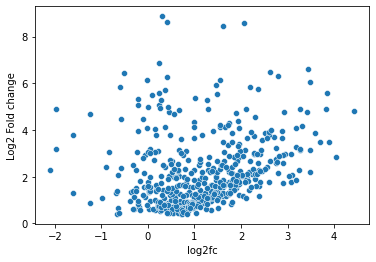

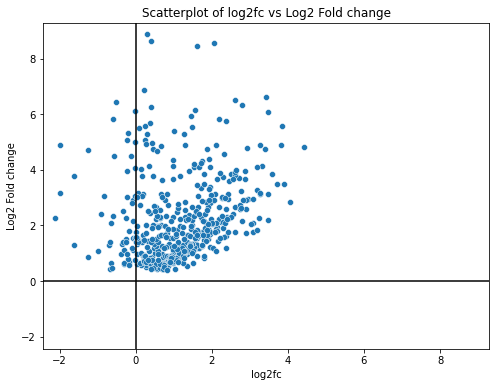

The Pearson correlation between log2fc and Log2 Fold change is 0.224

log2fc Statistics:
count    510.000000
mean       1.161981
std        1.007664
min       -2.109165
25%        0.518568
50%        1.061978
75%        1.791670
max        4.431867
Name: log2fc, dtype: float64

Log2 Fold change Statistics:
count    510.000000
mean       2.113376
std        1.513105
min        0.406747
25%        0.976698
50%        1.657672
75%        2.804082
max        8.873106
Name: Log2 Fold change, dtype: float64


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np

sns.scatterplot(data=df_merged, x="log2fc", y="Log2 Fold change")
plt.show()

def plot_and_analyze(df, col1, col2):
    # Plotting scatterplot
    fig, ax = plt.subplots(figsize=(8, 6))  # Create the figure and axes object
    
    sns.scatterplot(data=df, x=col1, y=col2, ax=ax)  # Pass the axes object to seaborn
    ax.set_title(f"Scatterplot of {col1} vs {col2}")  # Setting the title

    # Adding diagonal line
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    
    # Setting the X and Y limits to be the same
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    # Adding horizontal line
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')

    plt.show()

    # Calculating and displaying the Pearson correlation
    corr, _ = pearsonr(df[col1], df[col2])
    print(f"The Pearson correlation between {col1} and {col2} is {corr:.3f}")

    # Displaying statistics for each column
    print(f"\n{col1} Statistics:")
    print(df[col1].describe())

    print(f"\n{col2} Statistics:")
    print(df[col2].describe())

# calling the function
plot_and_analyze(df_merged, "log2fc", "Log2 Fold change")


In [8]:
display(df_aq)
display(df_paper)

,condpair,protein,fdr,pval,log2fc,consistency_score,num_ions,pseudoint1,pseudoint2,predscore
0,untreated_VS_egf_treated,FAAP100_Q0VG06_[667],9.212951e-01,8.972480e-01,-0.112912,7.117647,22,31344.387801,35381.106153,-0.208342
1,untreated_VS_egf_treated,YWHAQ_P27348_[nan],1.543796e-04,5.690817e-05,1.228666,4.958333,17,11878.694097,4304.466840,-0.129348
2,untreated_VS_egf_treated,PLEKHG3_A1L390_[827],8.903693e-02,5.775765e-02,0.167131,27.155172,63,88259.125235,99744.701040,-0.218378
3,untreated_VS_egf_treated,SPEN_Q96T58_[1140],5.071718e-09,1.060050e-09,-0.700895,14.250000,15,12949.511569,22557.598867,-0.109979
4,untreated_VS_egf_treated,ZC3H11A_O75152_[759],1.989315e-08,4.414207e-09,-0.888057,9.000000,18,8950.365724,14928.672028,-0.187153
...,...,...,...,...,...,...,...,...,...,...
14975,untreated_VS_egf_treated,PANK4_Q9NVE7_[nan],7.113916e-01,6.471859e-01,0.122280,1.800000,6,2543.600180,3387.154290,-0.192323
14976,untreated_VS_egf_treated,"VANGL1_Q8TAA9_[7, nan]",6.745867e-01,6.048314e-01,0.118701,4.000000,4,1792.290730,1650.729936,-0.302147
14977,untreated_VS_egf_treated,DTL_Q9NZJ0_[nan],8.769624e-01,8.433578e-01,-0.250374,7.000000,7,3011.849551,3181.021294,-0.177861
14978,untreated_VS_egf_treated,"TAB3_Q8N5C8_[373, 378]",1.661551e-04,6.170367e-05,-0.667426,7.000000,7,1589.265746,2641.073261,-0.118150


,Student's T-test q-value EGF_UT,Log2 Fold change,PG.UniProtIds,PTM_collapse_key,functional_score
0,"0,003607053","1,344322522",P01106,MYC_S62_M2,"0,998265828"
1,"0,00366611","1,33039252",P01106,MYC_T58_M2,"0,9959103"
2,0,"2,089077314",P16949,STMN1_S16_M2,"0,994587335"
3,"0,001580052","1,208856583",P04792,HSPB1_S82_M1,"0,993634985"
4,"0,007592213","1,512660344",O14950;P19105,MYL12B_T19_M2,"0,992116799"
...,...,...,...,...,...
654,"0,040063589","0,460898399",Q9UPQ0,LIMCH1_T215_M2,"0,502023187"
655,"0,017401107","3,774891059",O95243,MBD4_S318_M1,"0,501877838"
656,"0,005717678","1,18982633",Q8WWI1,LMO7_S805_M1,"0,501640812"
657,"0,006693557","3,551504453",Q9UP95,SLC12A4_S51_M1,"0,501631931"
